In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [2]:
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")   # extracts into folder "data"

In [5]:
import os
os.listdir("data/")

['Crop_recommendation.csv']

In [6]:
import pandas as pd

data = pd.read_csv("data/Crop_recommendation.csv")
print(data.head())   # shows first 5 rows

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We import the necessary libraries:

pandas → for handling the dataset

matplotlib & seaborn → for creating graphs and visualizations

In [8]:
data = pd.read_csv("data/Crop_recommendation.csv")
print(data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


We load the dataset into a DataFrame using pandas and display the first 5 rows to check the structure.

In [9]:
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nMissing values:\n", data.isnull().sum())

Dataset Shape: (2200, 8)

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


shape → tells number of rows and columns

columns → lists all features (N, P, K, pH, rainfall, etc.)

isnull().sum() → checks if there are any missing values

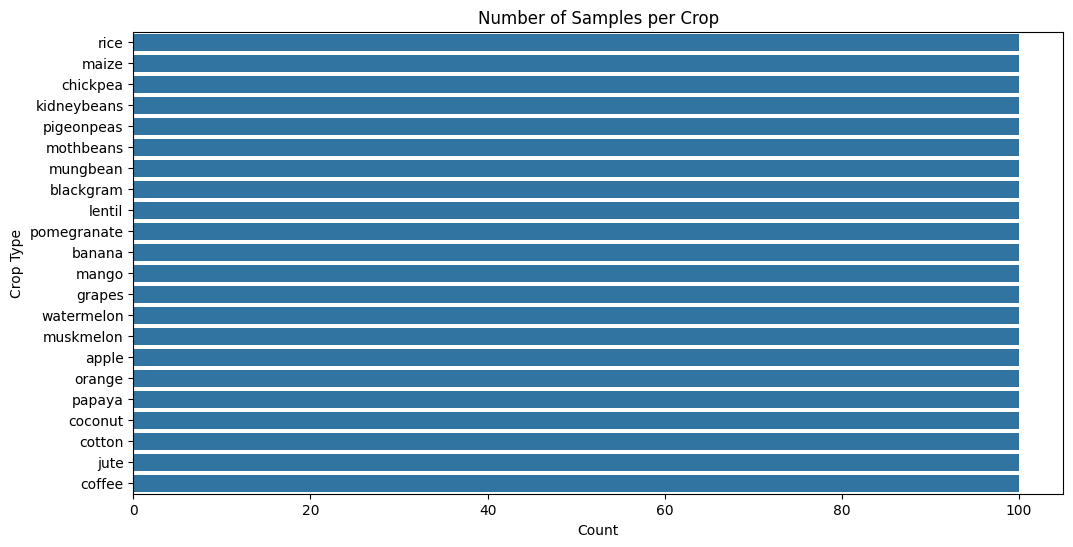

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(y=data['label'], order=data['label'].value_counts().index)
plt.title("Number of Samples per Crop")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()

This graph shows how many data samples are available for each crop in the dataset.

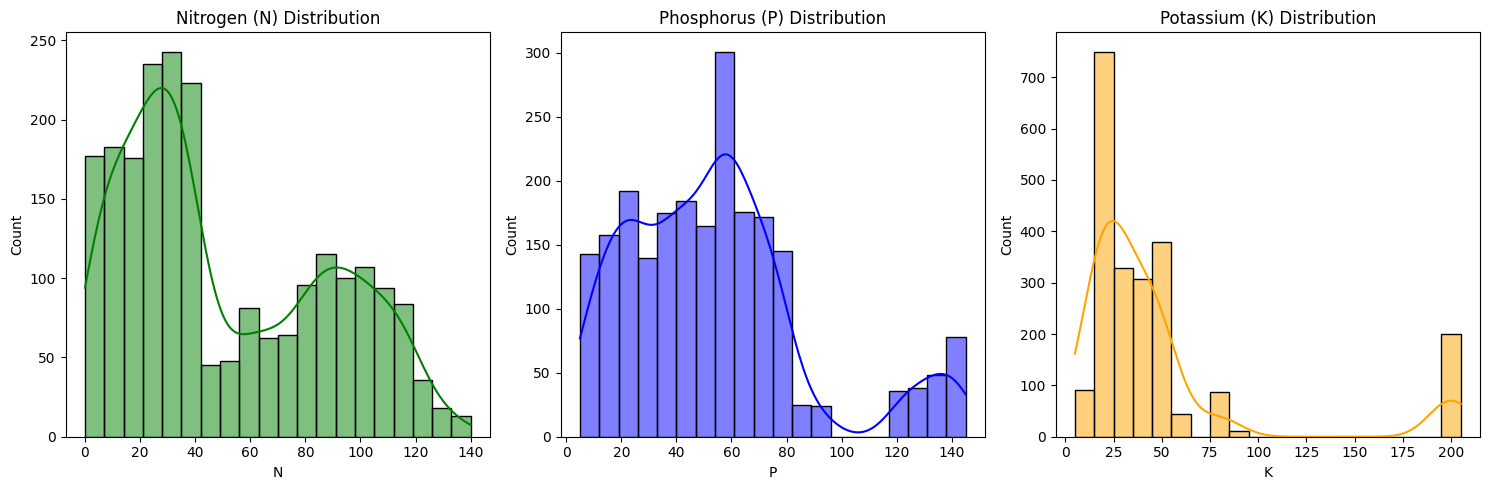

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(data['N'], bins=20, kde=True, ax=axes[0], color="green")
axes[0].set_title("Nitrogen (N) Distribution")
sns.histplot(data['P'], bins=20, kde=True, ax=axes[1], color="blue")
axes[1].set_title("Phosphorus (P) Distribution")
sns.histplot(data['K'], bins=20, kde=True, ax=axes[2], color="orange")
axes[2].set_title("Potassium (K) Distribution")
plt.tight_layout()
plt.show()

These histograms show how the soil nutrients (Nitrogen, Phosphorus, Potassium) are distributed across all crop samples.

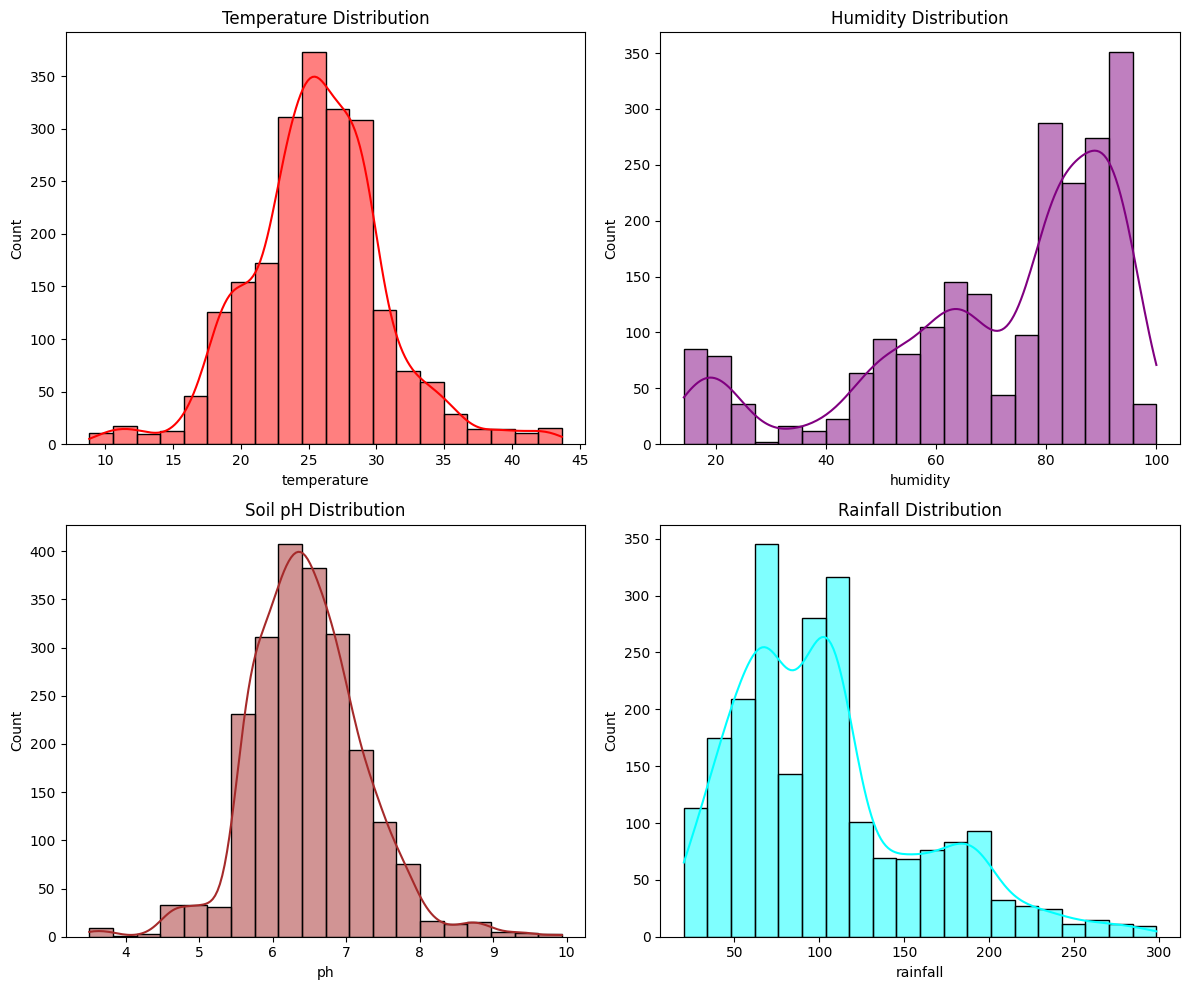

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.histplot(data['temperature'], bins=20, kde=True, ax=axes[0,0], color="red")
axes[0,0].set_title("Temperature Distribution")
sns.histplot(data['humidity'], bins=20, kde=True, ax=axes[0,1], color="purple")
axes[0,1].set_title("Humidity Distribution")
sns.histplot(data['ph'], bins=20, kde=True, ax=axes[1,0], color="brown")
axes[1,0].set_title("Soil pH Distribution")
sns.histplot(data['rainfall'], bins=20, kde=True, ax=axes[1,1], color="cyan")
axes[1,1].set_title("Rainfall Distribution")
plt.tight_layout()
plt.show()

These graphs show the environmental conditions (temperature, humidity, pH, rainfall) for all crop records

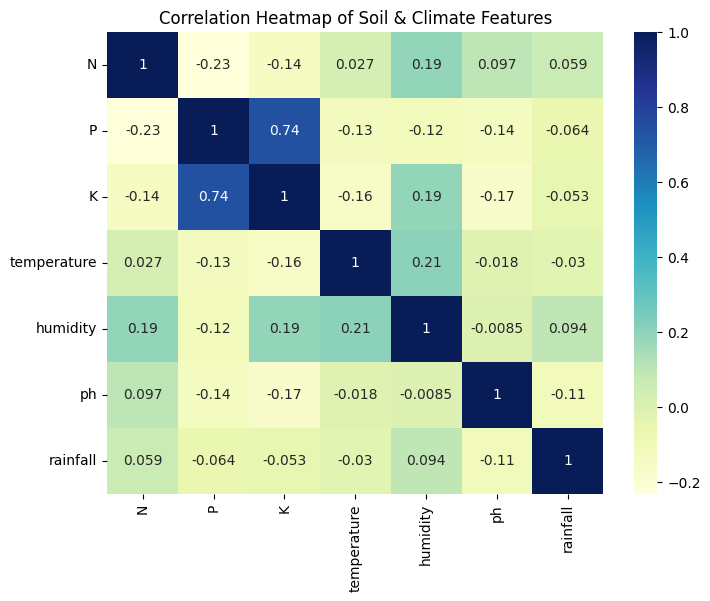

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(data.drop(columns=["label"]).corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Soil & Climate Features")
plt.show()

We drop the label column (since it contains crop names, not numbers) and then calculate correlations only between numeric features like N, P, K, temperature, humidity, pH, and rainfall.

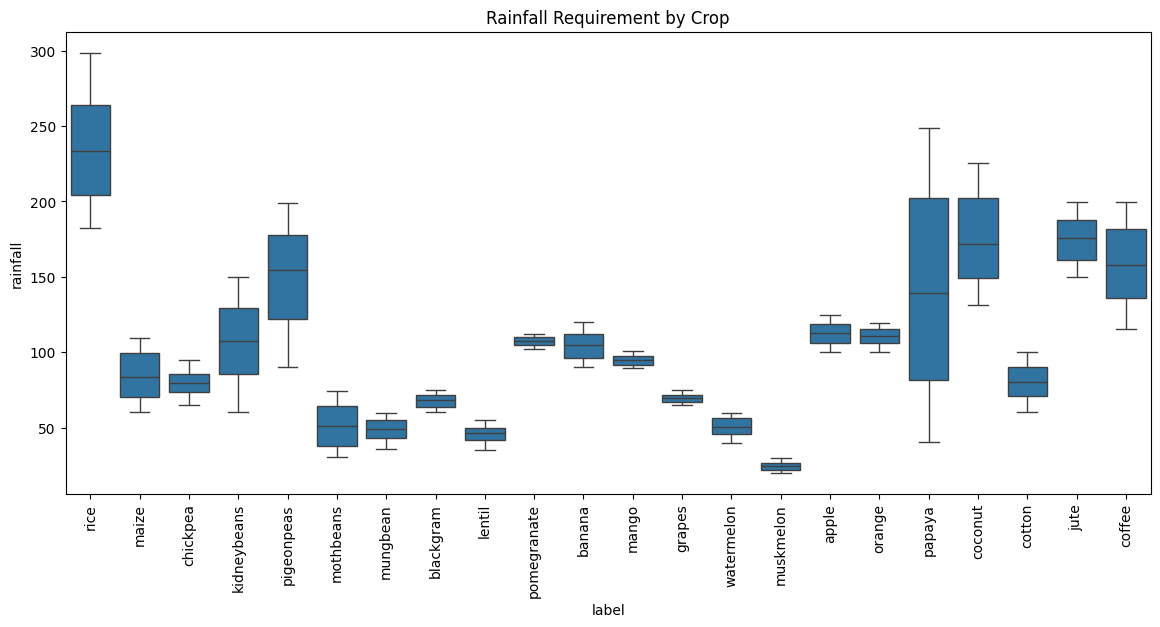

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(x="label", y="rainfall", data=data)
plt.xticks(rotation=90)
plt.title("Rainfall Requirement by Crop")
plt.show()

This boxplot compares the rainfall needed for each crop. Some crops need high rainfall (like rice), while others grow in low rainfall conditions.

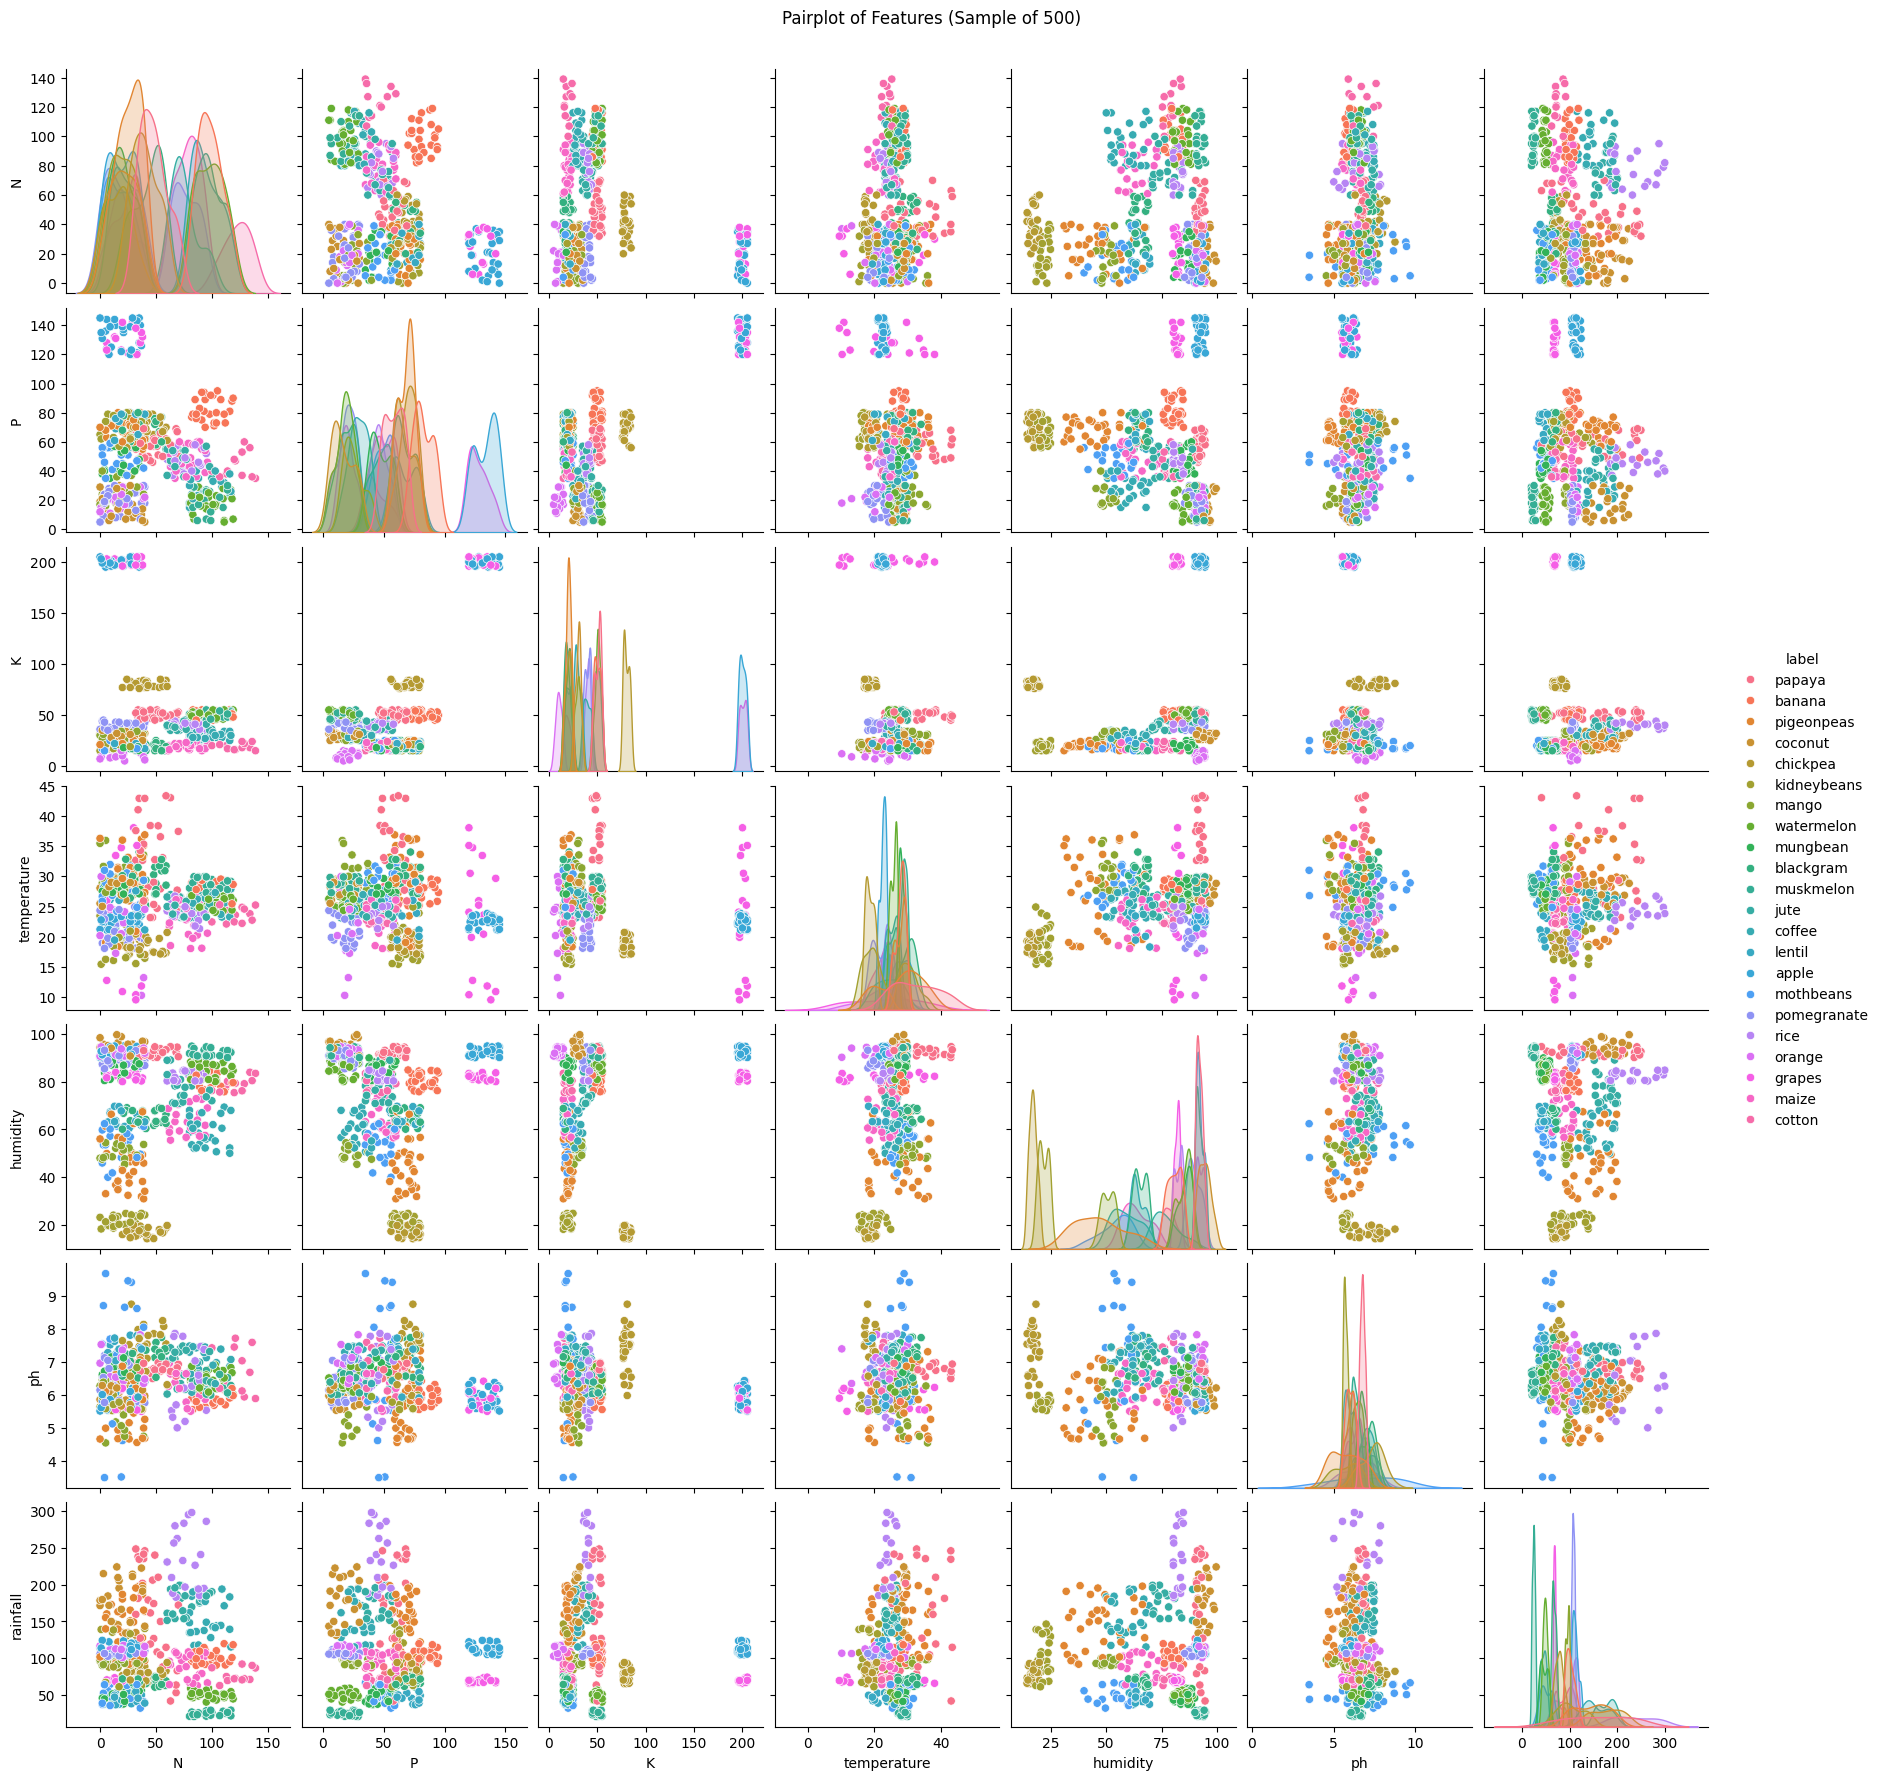

In [17]:
sns.pairplot(data.sample(500), hue="label", diag_kind="kde")
plt.suptitle("Pairplot of Features (Sample of 500)", y=1.02)
plt.show()

The pairplot shows relationships between features (like rainfall vs pH, temperature vs humidity) for a sample of 500 data points. Different crops are shown in different colors.